### Training an image classifier

1. torchvision에서 CIFAR10 데이터셋 로딩하고 정규화하기

2. Convolutional Neural Network 정의하기

3. 손실함수 정의하기

4. training data로 신경망 학습하기

5. test data로 신경망 테스트하기

#### 1. Load and normalize CIFAR10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.
There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.


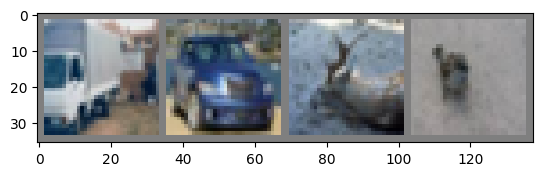

truck car   deer  bird 


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# random traning images 불러오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

#### 2. Define a Convolutional Neural Network

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

#### 3. Define a Loss function and optimizer

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### 4. Train the network

In [6]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i%2000==1999:
            print(f'[{epoch+1}, {i+1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
            
print('Finished Training')

There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.
There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.


[1,  2000] loss: 2.230
[1,  4000] loss: 1.879
[1,  6000] loss: 1.677
[1,  8000] loss: 1.575
[1, 10000] loss: 1.535
[1, 12000] loss: 1.440


There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.
There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.


[2,  2000] loss: 1.400
[2,  4000] loss: 1.390
[2,  6000] loss: 1.370
[2,  8000] loss: 1.337
[2, 10000] loss: 1.294
[2, 12000] loss: 1.276


There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.
There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.


[3,  2000] loss: 1.229
[3,  4000] loss: 1.229
[3,  6000] loss: 1.228
[3,  8000] loss: 1.221
[3, 10000] loss: 1.200
[3, 12000] loss: 1.180


There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.
There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.


[4,  2000] loss: 1.103
[4,  4000] loss: 1.120
[4,  6000] loss: 1.148
[4,  8000] loss: 1.120
[4, 10000] loss: 1.129
[4, 12000] loss: 1.120


There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.
There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.


[5,  2000] loss: 1.038
[5,  4000] loss: 1.061
[5,  6000] loss: 1.062
[5,  8000] loss: 1.055
[5, 10000] loss: 1.055
[5, 12000] loss: 1.068
Finished Training


In [7]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

#### 5. Test the network on the test data

There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.
There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.


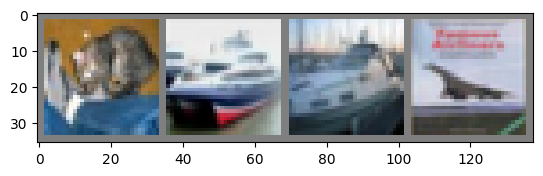

GroundTruth:  cat   ship  ship  plane


In [8]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [9]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [10]:
outputs = net(images)

In [11]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                                for j in range(4)))

Predicted:  cat   ship  car   car  


In [12]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.
There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.


Accuracy of the network on the 10000 test images: 59 %


In [13]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)

        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.
There was a problem when trying to write in your cache folder (/home/huggingface_cache/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.


Accuracy for class: plane is 58.6 %
Accuracy for class: car   is 68.0 %
Accuracy for class: bird  is 37.9 %
Accuracy for class: cat   is 38.6 %
Accuracy for class: deer  is 55.1 %
Accuracy for class: dog   is 57.1 %
Accuracy for class: frog  is 59.0 %
Accuracy for class: horse is 61.9 %
Accuracy for class: ship  is 78.4 %
Accuracy for class: truck is 79.4 %
